In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import scipy.stats as stats
import os
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from math import sqrt
from statsmodels.stats import weightstats as stests
sns.set()

In [2]:
# CSV File Paths
fileDischargeDalles = "Data/dischargeDalles.csv"
fileDischargeBull = "Data/dischargeBullRun.csv"

#Read in CSV
dischargeDal_df = pd.read_csv(fileDischargeDalles)
dischargeBull_df = pd.read_csv(fileDischargeBull)

#Splice out csv description that contains no value
tempDischargeDal_df = pd.DataFrame(dischargeDal_df[31:])
tempDischargeBull_df =pd.DataFrame(dischargeBull_df[32:])


G:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Re-name Columns to a useful state
tempDischargeDal_df = tempDischargeDal_df.rename(columns={"# ---------------------------------- WARNING ----------------------------------------":"Outfit",
                                                          "Unnamed: 1": "Station ID",
                                                          "Unnamed: 2": "Date/Time",
                                                          "Unnamed: 3": "Timezone",
                                                          "Unnamed: 4": "Discharge Rate Dalles (Cubic Ft./s)",
                                                          "Unnamed: 5": "Approval Code"}) 

#Split column that contains date and time combined
new = tempDischargeDal_df["Date/Time"].str.split(" ", n=1, expand = True)

tempDischargeDal_df["Date"]= new[0]
#tempDischargeDal_df["Time"]= new[1]


#Reformat date structure
tempDischargeDal_df['Date'] = pd.to_datetime(tempDischargeDal_df['Date']).dt.strftime('%Y/%m/%d')

#drop columns that will not be used
tempDischargeDal_df.drop(columns = ["Date/Time"], inplace = True)
tempDischargeDal_df.drop(columns = ["Timezone"], inplace = True)
tempDischargeDal_df.drop(columns = ["Approval Code"], inplace = True)

#Re-name Columns to a useful state
tempDischargeBull_df = tempDischargeBull_df.rename(columns={"# ---------------------------------- WARNING ----------------------------------------":"Outfit",
                                                          "Unnamed: 1": "Station ID",
                                                          "Unnamed: 2": "Date/Time",
                                                          "Unnamed: 3": "Timezone",
                                                          "Unnamed: 4": "Discharge Rate Bull Run (Cubic Ft./s)",
                                                          "Unnamed: 5": "Approval Code"}) 

#Split column that contains date and time combined
new = tempDischargeBull_df["Date/Time"].str.split(" ", n=1, expand = True)

tempDischargeBull_df["Date"]= new[0]
#tempDischargeBull_df["Time"]= new[1]


#Reformat date structure
tempDischargeBull_df['Date'] = pd.to_datetime(tempDischargeBull_df['Date']).dt.strftime('%Y/%m/%d')

#drop columns that will not be used
tempDischargeBull_df.drop(columns = ["Date/Time"], inplace = True)
tempDischargeBull_df.drop(columns = ["Timezone"], inplace = True)
tempDischargeBull_df.drop(columns = ["Approval Code"], inplace = True)

In [4]:
#Convert data in columns to float, and change to metirc conversion
tempDischargeDal_df["Discharge Rate Dalles (Cubic Ft./s)"] = tempDischargeDal_df["Discharge Rate Dalles (Cubic Ft./s)"].astype(float)
tempDischargeDal_df["Discharge Rate Dalles (Cubic m/s)"] = tempDischargeDal_df["Discharge Rate Dalles (Cubic Ft./s)"] * 0.02831684659
tempDischargeDal_df.drop(columns = ["Discharge Rate Dalles (Cubic Ft./s)"], inplace = True)

#Convert data in columns to float, and change to metirc conversion
tempDischargeBull_df["Discharge Rate Bull Run (Cubic Ft./s)"] = tempDischargeBull_df["Discharge Rate Bull Run (Cubic Ft./s)"].astype(float)
tempDischargeBull_df["Discharge Rate Bull Run (Cubic m/s)"] = tempDischargeBull_df["Discharge Rate Bull Run (Cubic Ft./s)"] * 0.02831684659
tempDischargeBull_df.drop(columns = ["Discharge Rate Bull Run (Cubic Ft./s)"], inplace = True)

In [5]:
#Merge the two csv files together
combined_discharge_df = pd.merge(tempDischargeBull_df, tempDischargeDal_df, how='inner', on=['Date', 'Date'])



In [6]:
#Create a daily average for each date
eventDate = combined_discharge_df.groupby("Date")

dayAverageDal = eventDate["Discharge Rate Dalles (Cubic m/s)"].mean()
dayAverageBull = eventDate["Discharge Rate Bull Run (Cubic m/s)"].mean()

#Create a new dataframe for post processing
eventDate_df = pd.DataFrame({"Discharge Average Dalles (Cubic m/s)": dayAverageDal, "Discharge Rate Bull Run (Cubic m/s)": dayAverageBull})

#eventDate_df

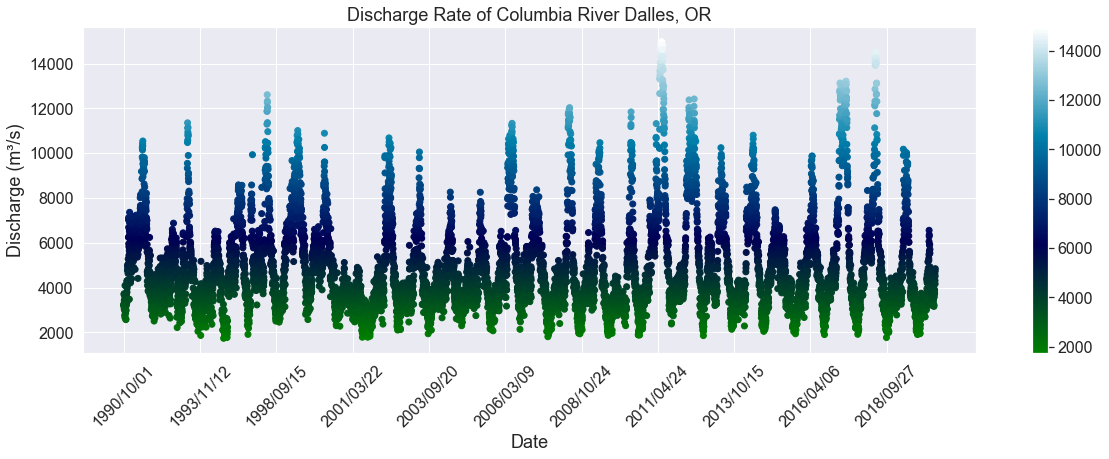

In [7]:
#Create a new column that contained the date
eventDate_df["Time"] = eventDate_df.index

#Create a tick location for labels
x_axis_1 = np.arange(len(eventDate_df['Time']))
tick_locations = [value for value in x_axis_1]


labels = eventDate_df.index

#Created variable to make parsing data easier with smaller variable name
y_1 = eventDate_df["Discharge Average Dalles (Cubic m/s)"]

#Matplotlib pallet color call
cm = mp.cm.get_cmap('ocean')

#Block of code for displaying a formatted chart
plt.figure(figsize=(20,6))
mp.rc('xtick', labelsize=16) 
mp.rc('ytick', labelsize=16) 
sc = plt.scatter(x_axis_1,y_1, c=y_1, cmap=cm)

# x-tick splicing so it doesn't produce x-axis label display overlap
plt.xticks(tick_locations[::900], labels[::900], rotation=45)
plt.colorbar(sc)
plt.xlabel("Date", fontsize=18) 
plt.ylabel("Discharge (m³/s)", fontsize=18)              
plt.title('Discharge Rate of Columbia River Dalles, OR', fontsize=18)        
plt.savefig('imagesTravis/dischargeColumbia.png', bbox_inches="tight", pad_inches=0.2)
plt.show()


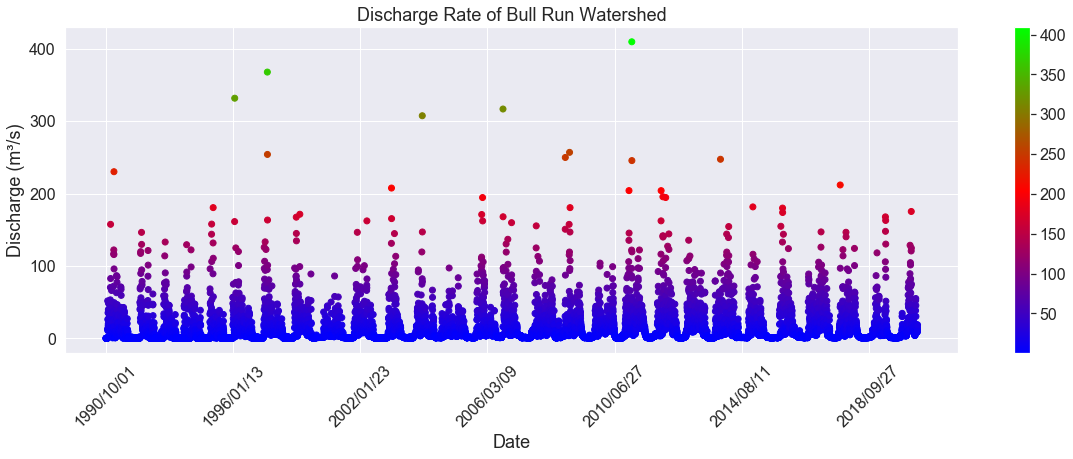

In [8]:
#Create a new column that contained the date
eventDate_df["Time"] = eventDate_df.index

#Create a tick location for labels
x_axis_2 = np.arange(len(eventDate_df['Time']))
tick_locations = [value for value in x_axis_2]

labels = eventDate_df.index

#Created variable to make parsing data easier with smaller variable name
y_2 = eventDate_df["Discharge Rate Bull Run (Cubic m/s)"]

#Matplotlib pallet color call
cm = mp.cm.get_cmap('brg')

#Block of code for displaying a formatted chart
plt.figure(figsize=(20,6))
mp.rc('xtick', labelsize=16) 
mp.rc('ytick', labelsize=16) 
sc = plt.scatter(x_axis_2,y_2, c=y_2, cmap=cm)

# x-tick splicing so it doesn't produce x-axis label display overlap
plt.xticks(tick_locations[::1500], labels[::1500], rotation=45)
plt.colorbar(sc)
plt.xlabel("Date", fontsize=18) 
plt.ylabel("Discharge (m³/s)", fontsize=18)              
plt.title('Discharge Rate of Bull Run Watershed', fontsize=18)                     
plt.savefig('imagesTravis/dischargeBull.png', bbox_inches="tight", pad_inches=0.2)
plt.show()

In [9]:
#Calculate min and max values for bull run column for normalization of the data
minBull = eventDate_df["Discharge Rate Bull Run (Cubic m/s)"].min()
maxBull = eventDate_df["Discharge Rate Bull Run (Cubic m/s)"].max()

#Calculate min and max values for columbia column for normalization of the data
minDal = eventDate_df["Discharge Average Dalles (Cubic m/s)"].min()
maxDal = eventDate_df["Discharge Average Dalles (Cubic m/s)"].max()

print(minBull, maxBull)
print(minDal, maxDal)

0.06642660262570806 409.5205951217878
1737.4155185876755 14970.762831550739


In [10]:
#Normalize the data to better fit into a histrogram
bully = (eventDate_df["Discharge Rate Bull Run (Cubic m/s)"] - minBull ) / ( maxBull - minBull) 
dally = (eventDate_df["Discharge Average Dalles (Cubic m/s)"] - minDal ) / ( maxDal - minDal)


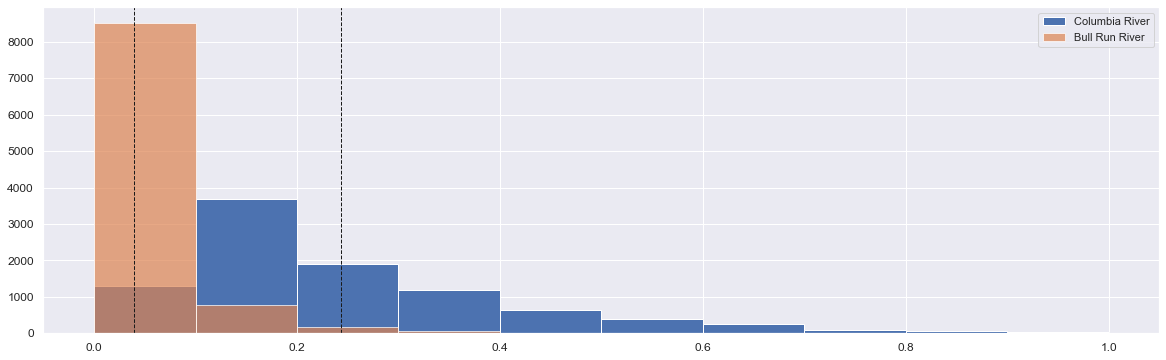

In [11]:
#Resets the font size of title and axis
mp.rc('xtick', labelsize=12) 
mp.rc('ytick', labelsize=12) 

# Histogram Plot of Data after normalization
plt.figure(figsize=(20,6))
plt.hist(dally, 10, label="Columbia River")
plt.hist(bully, 10, alpha=0.7, label="Bull Run River")
plt.axvline(dally.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(bully.mean(), color='k', linestyle='dashed', linewidth=1)

plt.tight_layout
plt.legend()
#plt.savefig('images/dischargeHist.png', bbox_inches="tight", pad_inches=0.2)
plt.show()

In [12]:
bully.max(), dally.max()

(1.0, 1.0)

In [13]:
#Calculate t-score and p-value for testing purpose
t_stat, p_val = stats.ttest_ind(dally, bully, equal_var=False)

print(t_stat, p_val)

113.13131114131903 0.0


-1.2961060178917158e-13 0.9999999999998966


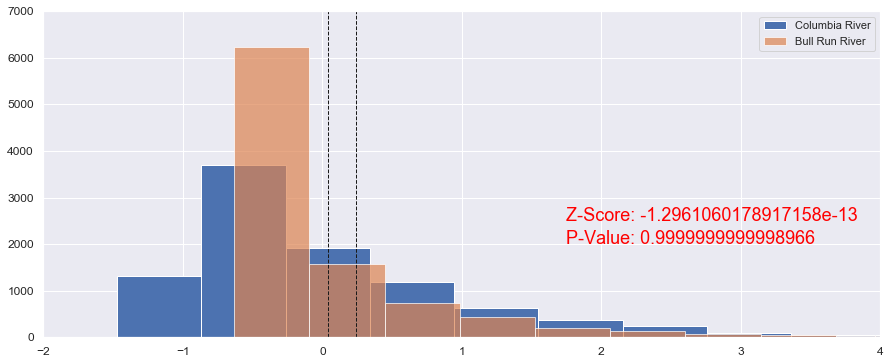

In [14]:
#Calculate the mean of the values for bull and columbia for standardization
bulmean = eventDate_df["Discharge Rate Bull Run (Cubic m/s)"].mean()
dalmean = eventDate_df["Discharge Average Dalles (Cubic m/s)"].mean()

#Calculate the standard deviation of the values for bull and columbia for standardization
bulstd = eventDate_df["Discharge Rate Bull Run (Cubic m/s)"].std()
dalstd = eventDate_df["Discharge Average Dalles (Cubic m/s)"].std()

#Standardize the data to better fit into a histrogram
dalStdHist = (y_1 - dalmean)/dalstd
bulStdHist = (y_2 - bulmean)/bulstd

#Calculate the z-score and p-value
ztest, pVal = stests.ztest(dalStdHist, bulStdHist)
print(ztest, pVal)

#Variables used to displaye z-score and p-value
ztestDisplay = "Z-Score: " + str(ztest)
pvalueDisplay = "P-Value: " + str(pVal)

#Resets the font size of title and axis
mp.rc('xtick', labelsize=12) 
mp.rc('ytick', labelsize=12) 

# Histogram Plot of Data that has been standardized
plt.figure(figsize=(15,6))
plt.hist(dalStdHist, 10, label="Columbia River")
plt.hist(bulStdHist, 30, alpha=0.7, label="Bull Run River")
plt.axvline(dally.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(bully.mean(), color='k', linestyle='dashed', linewidth=1)
plt.xlim((-2,4))
plt.ylim((0,7000))
plt.tight_layout
plt.legend()

plt.annotate(ztestDisplay,(1.75,2500), fontsize=18, color="red")
plt.annotate(pvalueDisplay,(1.75,2000), fontsize=18, color="red")

plt.savefig('imagesTravis/dischargeHist.png', bbox_inches="tight", pad_inches=0.2)
plt.show()

#t_stat, p_val = stats.ttest_ind(dalStdHist, bulStdHist, equal_var=True)
#print(t_stat, p_val)

In [15]:
#Calculate z-score and p-value for testing purpose
ztest, pVal = stests.ztest(dalStdHist, bulStdHist)
print(ztest, pVal)

-1.2961060178917158e-13 0.9999999999998966
